In [4]:
import pandas as pd
listings = pd.read_csv('Listings.csv', encoding = "ISO-8859-1", low_memory=False)
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [10]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [15]:
paris_listings = (listings.query('city == "Paris"').loc[:,["host_since","neighbourhood","city","price","accommodates"]])
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   price          64690 non-null  int64         
 4   accommodates   64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [16]:
paris_listings.isna().sum()

,0
host_since,33
neighbourhood,0
city,0
price,0
accommodates,0


In [19]:
paris_listings.describe()

,host_since,price,accommodates
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,113.096445,3.037997
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,59.000000,2.000000
50%,2015-07-07 00:00:00,80.000000,2.000000
75%,2017-05-29 00:00:00,120.000000,4.000000
max,2021-02-07 00:00:00,12000.000000,16.000000
std,NaN,214.433668,1.588766


In [23]:
paris_listings.query("price == 0").count()

,0
host_since,62
neighbourhood,62
city,62
price,62
accommodates,62


In [26]:
paris_listings_neighbourhood =  (paris_listings.groupby('neighbourhood').agg({'price': 'mean'}))
paris_listings_neighbourhood.head()

,price
neighbourhood,
Batignolles-Monceau,102.612702
Bourse,149.496801
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Elysee,210.536765


In [37]:
paris_listings_accommodates = (paris_listings.query("neighbourhood == 'Elysee'").groupby('accommodates').agg({'price': 'mean'}).sort_values('price'))
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [39]:
paris_listings_over_time = (paris_listings.set_index('host_since').resample("Y").agg({'neighbourhood': 'count','price' : 'mean'}))
paris_listings_over_time.head()

<ipython-input-39-03eb35a073e5>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  paris_listings_over_time = (paris_listings.set_index('host_since').resample("Y").agg({'neighbourhood': 'count','price' : 'mean'}))


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


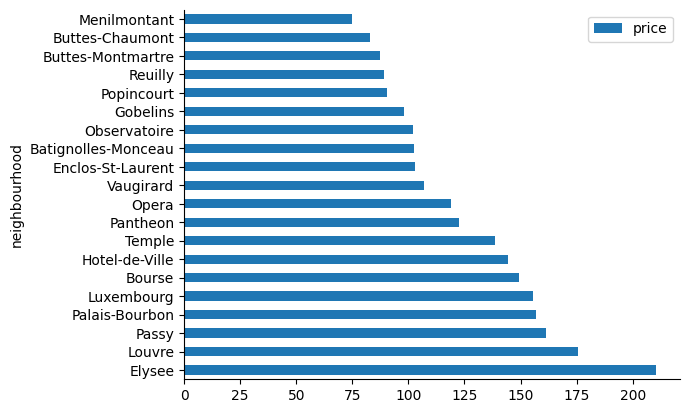

In [53]:
import seaborn as sns
paris_listings_neighbourhood.plot.barh()
sns.despine()

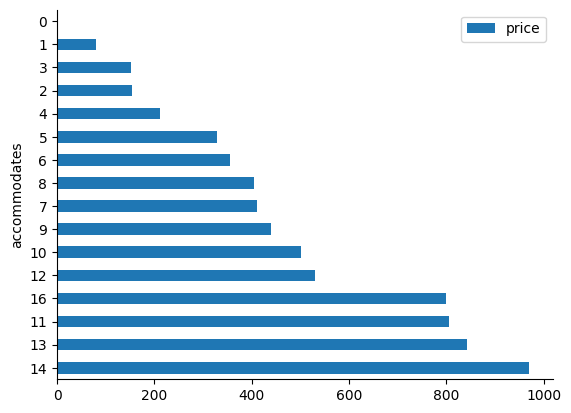

In [52]:
paris_listings_accommodates.plot.barh()
sns.despine()

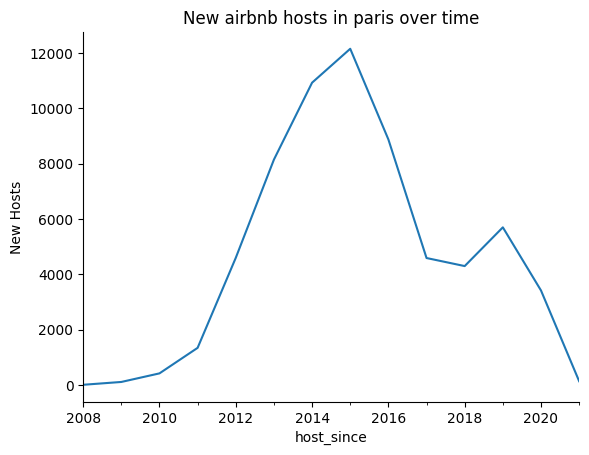

In [57]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel = "New Hosts",
    title = "New airbnb hosts in paris over time"
)
sns.despine()

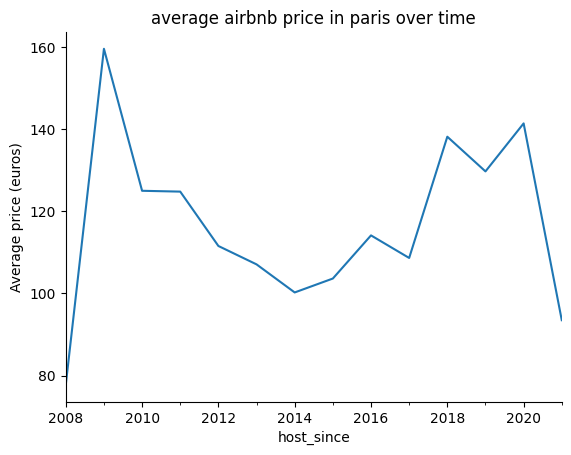

In [59]:
paris_listings_over_time['price'].plot(
    ylabel = "Average price (euros)",
    title = "average airbnb price in paris over time"
)
sns.despine()

Text(0.5, 1.0, '2015 regulations lead to fewer new hosts, higher prices')

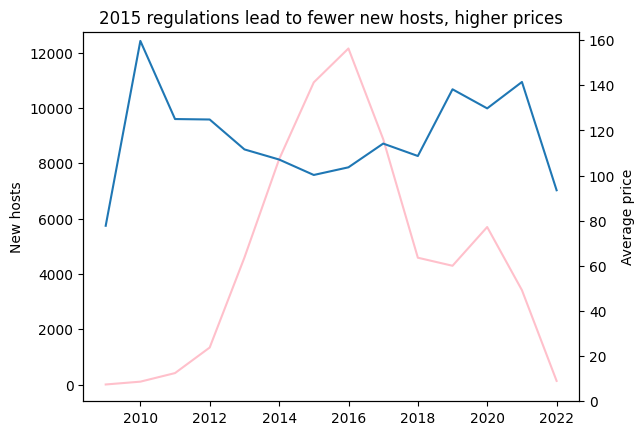

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = "New hosts",
    c = "pink"
)

ax.set_ylabel("New hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = "Average price",

)
ax2.set_ylim(0)

ax2.set_ylabel("Average price")

ax.set_title("2015 regulations lead to fewer new hosts, higher prices")

In [47]:
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price', ascending=False)
highest_priced_neighborhood = paris_listings_neighbourhood.index[0]
print(f"The neighborhood with the highest average AirBnB listing price in Paris is: {highest_priced_neighborhood}")

The neighborhood with the highest average AirBnB listing price in Paris is: Elysee
